In [1]:
import numpy as np
import itertools as it

In [2]:
#read-in file and write expressions to list
filename = "calibr_model_uindex.txt"
with open(filename, 'r') as f:
    raw_list = [word for line in f for word in line.split()]
    #print(raw_list)

In [3]:
# #unpack SHEMAT-expressions (5*X to X X X X X) if "*" is found, else just append to list
# #this is very likely very, very slow and inefficient!
# %timeit unpack(raw_list)

# def unpack(raw_list):
#     unpacked_list = []
#     for word in raw_list:
#         if "*" in word:
#             i=0
#             while i < int(word.split('*')[0]):
#                 unpacked_list.append(int(word.split('*')[1]))
#                 i+=1
#         else:
#             unpacked_list.append(int(word))
#     return unpacked_list
            
# upl = unpack(raw_list)            
# print(len(upl))
# print(upl)

In [4]:
#another attempt at unpack with comprehensions, still very clunky but a lot faster.
#%timeit unpack2(raw_list)

def unpack2(raw_list):
    splitlist = []
    for element in raw_list:
        if "*" in element:
            splitlist.append(element.split("*"))
        else:
            splitlist.append(['1',element])
            
    unpacked_temp = [[int(X)]*int(Y) for Y,X in splitlist]
    unpacked_list = [item for pairs in unpacked_temp for item in pairs]
    return unpacked_list

# upl = unpack2(raw_list)            
# print(len(upl))
# print(upl)

In [5]:
# #compare if second method is congruent with first
# unpacked1 = unpack(raw_list)
# unpacked2 = unpack2(raw_list)
# unpacked1 == unpacked2

In [6]:
a = np.array(unpack2(raw_list))
a = np.reshape(a,(50,50,210),order='F') # <--reshape to actual ijk-dimensions of SHEMAT-Model
print(a)

[[[1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  ..., 
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]]

 [[1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  ..., 
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]]

 [[1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  ..., 
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]]

 ..., 
 [[1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  ..., 
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]]

 [[1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  ..., 
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]]

 [[1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  ..., 
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]
  [1 1 1 ..., 9 9 9]]]


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(1,50,50)
z = np.linspace(1,210,210)
Z,X = np.meshgrid(z,x)

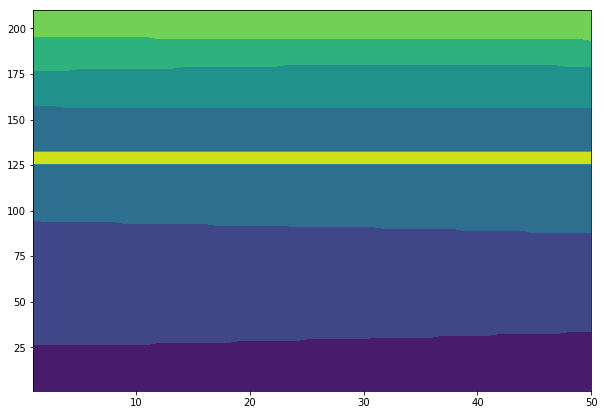

In [10]:
fig = plt.figure(figsize=[10,7])
plt.contourf(X,Z,a[9,:,:])

In [9]:
#cube-slicing: Set parts of the cube to a specific unit e.g. vertical plane || i at x = 3: [3,:,:]
a[:,:,125:132] = np.max(a+1)

In [11]:
#reshape back to 1d
a = a.flatten('F')
a
#np.savetxt(filename+"_outarr", a, fmt='%d', delimiter=',', newline=' ')

array([1, 1, 1, ..., 9, 9, 9])

In [12]:
#re-convert array to list
a = a.tolist()

In [13]:
#collapse to SHEMAT-notation

sequence = [len(list(group)) for key, group in it.groupby(a)]
unit_id = [key for key, group in it.groupby(a)]
combined = ["%s*%s" % (pair) for pair in zip(sequence,unit_id)]
print(combined)

['42527*1', '2*2', '48*1', '1*2', '49*1', '1*2', '2397*1', '4*2', '20*1', '1*2', '25*1', '3*2', '47*1', '3*2', '47*1', '3*2', '48*1', '1*2', '49*1', '1*2', '49*1', '1*2', '2196*1', '6*2', '17*1', '4*2', '23*1', '5*2', '18*1', '4*2', '23*1', '5*2', '19*1', '3*2', '23*1', '5*2', '19*1', '3*2', '24*1', '3*2', '20*1', '3*2', '24*1', '3*2', '21*1', '2*2', '24*1', '3*2', '21*1', '2*2', '24*1', '3*2', '21*1', '2*2', '25*1', '1*2', '22*1', '2*2', '25*1', '1*2', '23*1', '1*2', '25*1', '1*2', '23*1', '1*2', '49*1', '1*2', '49*1', '1*2', '1871*1', '8*2', '14*1', '7*2', '21*1', '7*2', '16*1', '6*2', '21*1', '7*2', '16*1', '6*2', '21*1', '7*2', '16*1', '6*2', '22*1', '5*2', '18*1', '5*2', '22*1', '5*2', '18*1', '5*2', '22*1', '5*2', '18*1', '5*2', '22*1', '5*2', '18*1', '5*2', '23*1', '3*2', '20*1', '4*2', '23*1', '3*2', '20*1', '4*2', '23*1', '3*2', '20*1', '4*2', '24*1', '1*2', '21*1', '4*2', '24*1', '1*2', '22*1', '3*2', '24*1', '1*2', '22*1', '3*2', '24*1', '1*2', '22*1', '3*2', '47*1', '3*2', 

In [18]:
#case one: write uncollapsed array to file
np.savetxt(filename+"_out", a, fmt='%d', delimiter=',', newline=' ')

In [14]:
#case two: write collapsed
with open(filename+"_out", 'w') as f:
    for item in combined:
        f.write("%s " % item)